In [1]:
import pandas as pd

# Load IoT sensor data from CSV (Generated in Homework 1)
df = pd.read_csv("IoT Data Simulation.csv")

# Display the first few rows
print(df.head())

    Sensor ID                                     Location  Temperature (°C)  \
0     Arm_968  Haleyberg, Saint Vincent and the Grenadines              32.9   
1   Serve_918                          Lopezland, Cambodia              30.7   
2   Every_472                        Theodorebury, Eritrea              25.7   
3  Forget_663                     New Clarence, Cape Verde              30.1   
4    Safe_507                       East Justinmouth, Oman              25.3   

   Humidity (%)  Air Quality Index (AQI)           Timestamp  \
0            49                      179  2025-05-10 0:27:50   
1            77                       75  2025-05-10 0:27:51   
2            41                      170  2025-05-10 0:27:52   
3            47                       72  2025-05-10 0:27:53   
4            78                      176  2025-05-10 0:27:54   

   Soil Moisture (%)  Particulate Matter 2.5 Micrometers (pm2.5)  \
0                 16                                         479  

In [2]:
from web3 import Web3

ganache_url = "http://127.0.0.1:7545"  # Change port if necessary
web3 = Web3(Web3.HTTPProvider(ganache_url))

if web3.is_connected():
    print("✅ Connected to Ganache successfully!")
else:
    print("❌ Connection failed. Ensure Ganache is running.")

✅ Connected to Ganache successfully!


In [3]:
import json

contract_address = "0xd8c0E6Ba6eD37B220325B19aD81B131b0ffA67B7"

with open('abi.json') as f:
	abi = json.load(f)  # Replace with actual ABI JSON list

# Load the smart contract
contract = web3.eth.contract(address=contract_address, abi=abi)

# Set the default sender address (first account from Ganache)
web3.eth.default_account = web3.eth.accounts[0]


print(f"✅ Connected to Smart Contract at {contract_address}")

✅ Connected to Smart Contract at 0xd8c0E6Ba6eD37B220325B19aD81B131b0ffA67B7


In [4]:
total_records = contract.functions.getTotalRecords().call()
print(f"Total Records: {total_records}")

Total Records: 0


In [5]:
txn = contract.functions.storeData("TEST001", "Temperature", "22.5°C").transact({
    'from': web3.eth.default_account,
    'gas': 1000000
})
web3.eth.wait_for_transaction_receipt(txn)
print("✅ Dummy data stored on blockchain!")

✅ Dummy data stored on blockchain!


In [6]:
total_records = contract.functions.getTotalRecords().call()
print(f"Total Records: {total_records}")

record = contract.functions.getRecord(0).call()
print("First Stored Record:", record)

Total Records: 1
First Stored Record: [1750143273, 'TEST001', 'Temperature', '22.5°C']


In [7]:
import time

def send_iot_data(device_id, data_type, data_value):
    txn = contract.functions.storeData(device_id, data_type, data_value).transact({
        'from': web3.eth.default_account,
        'gas': 3000000
    })
    receipt = web3.eth.wait_for_transaction_receipt(txn)
    print(f"✅ Data Stored: {data_type} - {data_value}, Txn Hash: {receipt.transactionHash.hex()}")

In [8]:
sensor_fields = [
    'Temperature (°C)',
    'Humidity (%)',
    'Air Quality Index (AQI)',
    'Soil Moisture (%)',
    'Particulate Matter 2.5 Micrometers (pm2.5)',
    'Particulate Matter 10 Micrometers (pm10)',
    'Ozone Concentration (o3)',
    'Nitrogen Dioxide Concentration (no2)',
    'Sulfur Dioxide Concentration (so2)',
    'Carbon Monoxide Concentration (co)',
    'Water Quality Index',
    'Water pH Level',
    'Water Turbidity',
    'Contamination Level'
]

# Only send the first 50 rows for testing
for i, row in enumerate(df.iterrows()):
    if i >= 50:
        break
    row = row[1]
    sensor_id = str(row["Sensor ID"])
    for field in sensor_fields:
        try:
            data_value = str(row[field])
            send_iot_data(sensor_id, field, data_value)
            time.sleep(1)
        except Exception as e:
            print(f"❌ Error sending {field} for {sensor_id}: {e}")

✅ Data Stored: Temperature (°C) - 32.9, Txn Hash: a8bfea5405dcdf3a10c9b51ad24f9235e1e622f9724c1a22adb59972e367b932
✅ Data Stored: Humidity (%) - 49, Txn Hash: 01d36516d8e043859dc92a7a3c73bb62ab5d0f62d18260946cccff6447421786
✅ Data Stored: Air Quality Index (AQI) - 179, Txn Hash: 29489041ce1af91da39f814149e5e22ad3273f8816442323219b1e455f9d420b
✅ Data Stored: Soil Moisture (%) - 16, Txn Hash: 2b17d2b47765ae18014fa978c5b63f1f83048e3901a8eadfbe05f91479d54cbc
✅ Data Stored: Particulate Matter 2.5 Micrometers (pm2.5) - 479, Txn Hash: d492cf99346d16b0fa0060a136c825ab2c6c275722f1cd5bb8cf149e51a67088
✅ Data Stored: Particulate Matter 10 Micrometers (pm10) - 237, Txn Hash: 34a46c9cddff0a41911d76965910817184a001e82ff3ec94a4b7740436ce7d68
✅ Data Stored: Ozone Concentration (o3) - 0.105, Txn Hash: 74207c5a85aa9c179941711fc534d4cb372b3b8762f6d84fa63b1f199301fafa
✅ Data Stored: Nitrogen Dioxide Concentration (no2) - 391, Txn Hash: 1b776b4b614c01009c74afbfb70f897709392fc199da1e9044669fe0d212027f
✅ Dat

In [9]:
total_records = contract.functions.getTotalRecords().call()
print(f"📦 Total IoT records stored: {total_records}")

📦 Total IoT records stored: 701


In [10]:
if total_records > 0:
    record = contract.functions.getRecord(0).call()
    print("📝 First Stored Record:", record)

📝 First Stored Record: [1750143273, 'TEST001', 'Temperature', '22.5°C']


In [11]:
import pandas as pd

# Retrieve all IoT records
data = []
for i in range(total_records):
    record = contract.functions.getRecord(i).call()
    data.append({
        "timestamp": record[0],
        "device_id": record[1],
        "data_type": record[2],
        "data_value": record[3]
    })

# Convert to a DataFrame
df = pd.DataFrame(data)

# Convert timestamp to readable format
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

# Display first few records
print(df.head())

            timestamp device_id                data_type data_value
0 2025-06-17 06:54:33   TEST001              Temperature     22.5°C
1 2025-06-17 06:54:33   Arm_968         Temperature (°C)       32.9
2 2025-06-17 06:54:34   Arm_968             Humidity (%)         49
3 2025-06-17 06:54:35   Arm_968  Air Quality Index (AQI)        179
4 2025-06-17 06:54:36   Arm_968        Soil Moisture (%)         16


In [12]:
import numpy as np

# Extract numeric values from 'data_value' where applicable
df["numeric_value"] = df["data_value"].str.extract(r'(\d+\.?\d*)').astype(float)

# Handle missing values (if any)
df.fillna(0, inplace=True)

# Display cleaned data
print(df.head())

            timestamp device_id                data_type data_value  \
0 2025-06-17 06:54:33   TEST001              Temperature     22.5°C   
1 2025-06-17 06:54:33   Arm_968         Temperature (°C)       32.9   
2 2025-06-17 06:54:34   Arm_968             Humidity (%)         49   
3 2025-06-17 06:54:35   Arm_968  Air Quality Index (AQI)        179   
4 2025-06-17 06:54:36   Arm_968        Soil Moisture (%)         16   

   numeric_value  
0           22.5  
1           32.9  
2           49.0  
3          179.0  
4           16.0  


In [13]:
# Save cleaned IoT data to a CSV file
df.to_csv("Cleaned IoT Data Simulation.csv", index=False)

print("✅ Cleaned IoT data saved successfully as Cleaned IoT Data Simulation.csv")

✅ Cleaned IoT data saved successfully as Cleaned IoT Data Simulation.csv


In [14]:
import pandas as pd

# Load cleaned IoT data
df = pd.read_csv("Cleaned IoT Data Simulation.csv")

# Display first few rows to verify data
print(df.head())

             timestamp device_id                data_type data_value  \
0  2025-06-17 06:54:33   TEST001              Temperature     22.5°C   
1  2025-06-17 06:54:33   Arm_968         Temperature (°C)       32.9   
2  2025-06-17 06:54:34   Arm_968             Humidity (%)         49   
3  2025-06-17 06:54:35   Arm_968  Air Quality Index (AQI)        179   
4  2025-06-17 06:54:36   Arm_968        Soil Moisture (%)         16   

   numeric_value  
0           22.5  
1           32.9  
2           49.0  
3          179.0  
4           16.0  


In [15]:
# Convert timestamp column to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

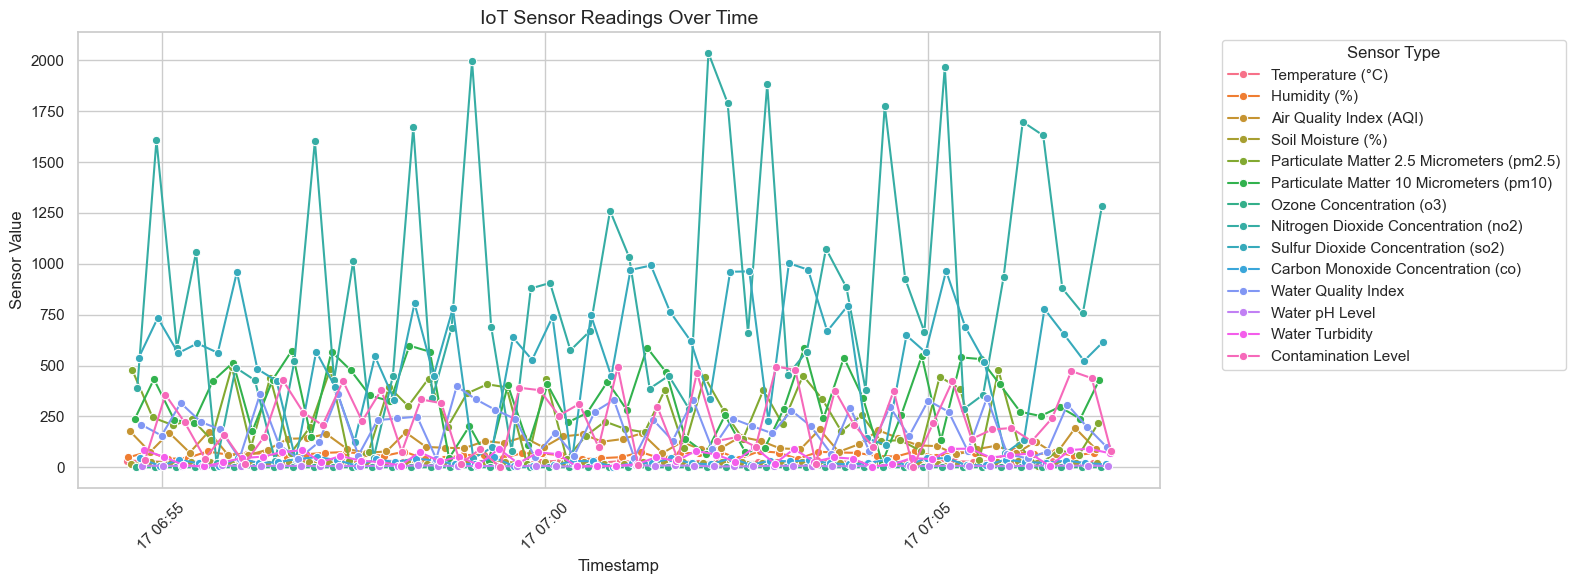

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean columns
df.columns = df.columns.str.strip()

# Select the sensor fields you want to include in the plot
sensor_fields = [
    'Temperature (°C)', 'Humidity (%)', 'Air Quality Index (AQI)',
    'Soil Moisture (%)', 'Particulate Matter 2.5 Micrometers (pm2.5)',
    'Particulate Matter 10 Micrometers (pm10)', 'Ozone Concentration (o3)',
    'Nitrogen Dioxide Concentration (no2)', 'Sulfur Dioxide Concentration (so2)',
    'Carbon Monoxide Concentration (co)', 'Water Quality Index',
    'Water pH Level', 'Water Turbidity', 'Contamination Level'
]

df_filtered = df[df['data_type'].isin(sensor_fields)]

# Plot it!
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

sns.lineplot(
    data=df_filtered,
    x='timestamp',
    y='numeric_value',
    hue='data_type',
    marker='o'
)

# Rotate timestamps for readability
plt.xticks(rotation=45)

# Title and axis labels
plt.title("IoT Sensor Readings Over Time", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Sensor Value", fontsize=12)

# Push legend outside the plot
plt.legend(title="Sensor Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Make layout tighter
plt.tight_layout()

# Show the plot
plt.show()


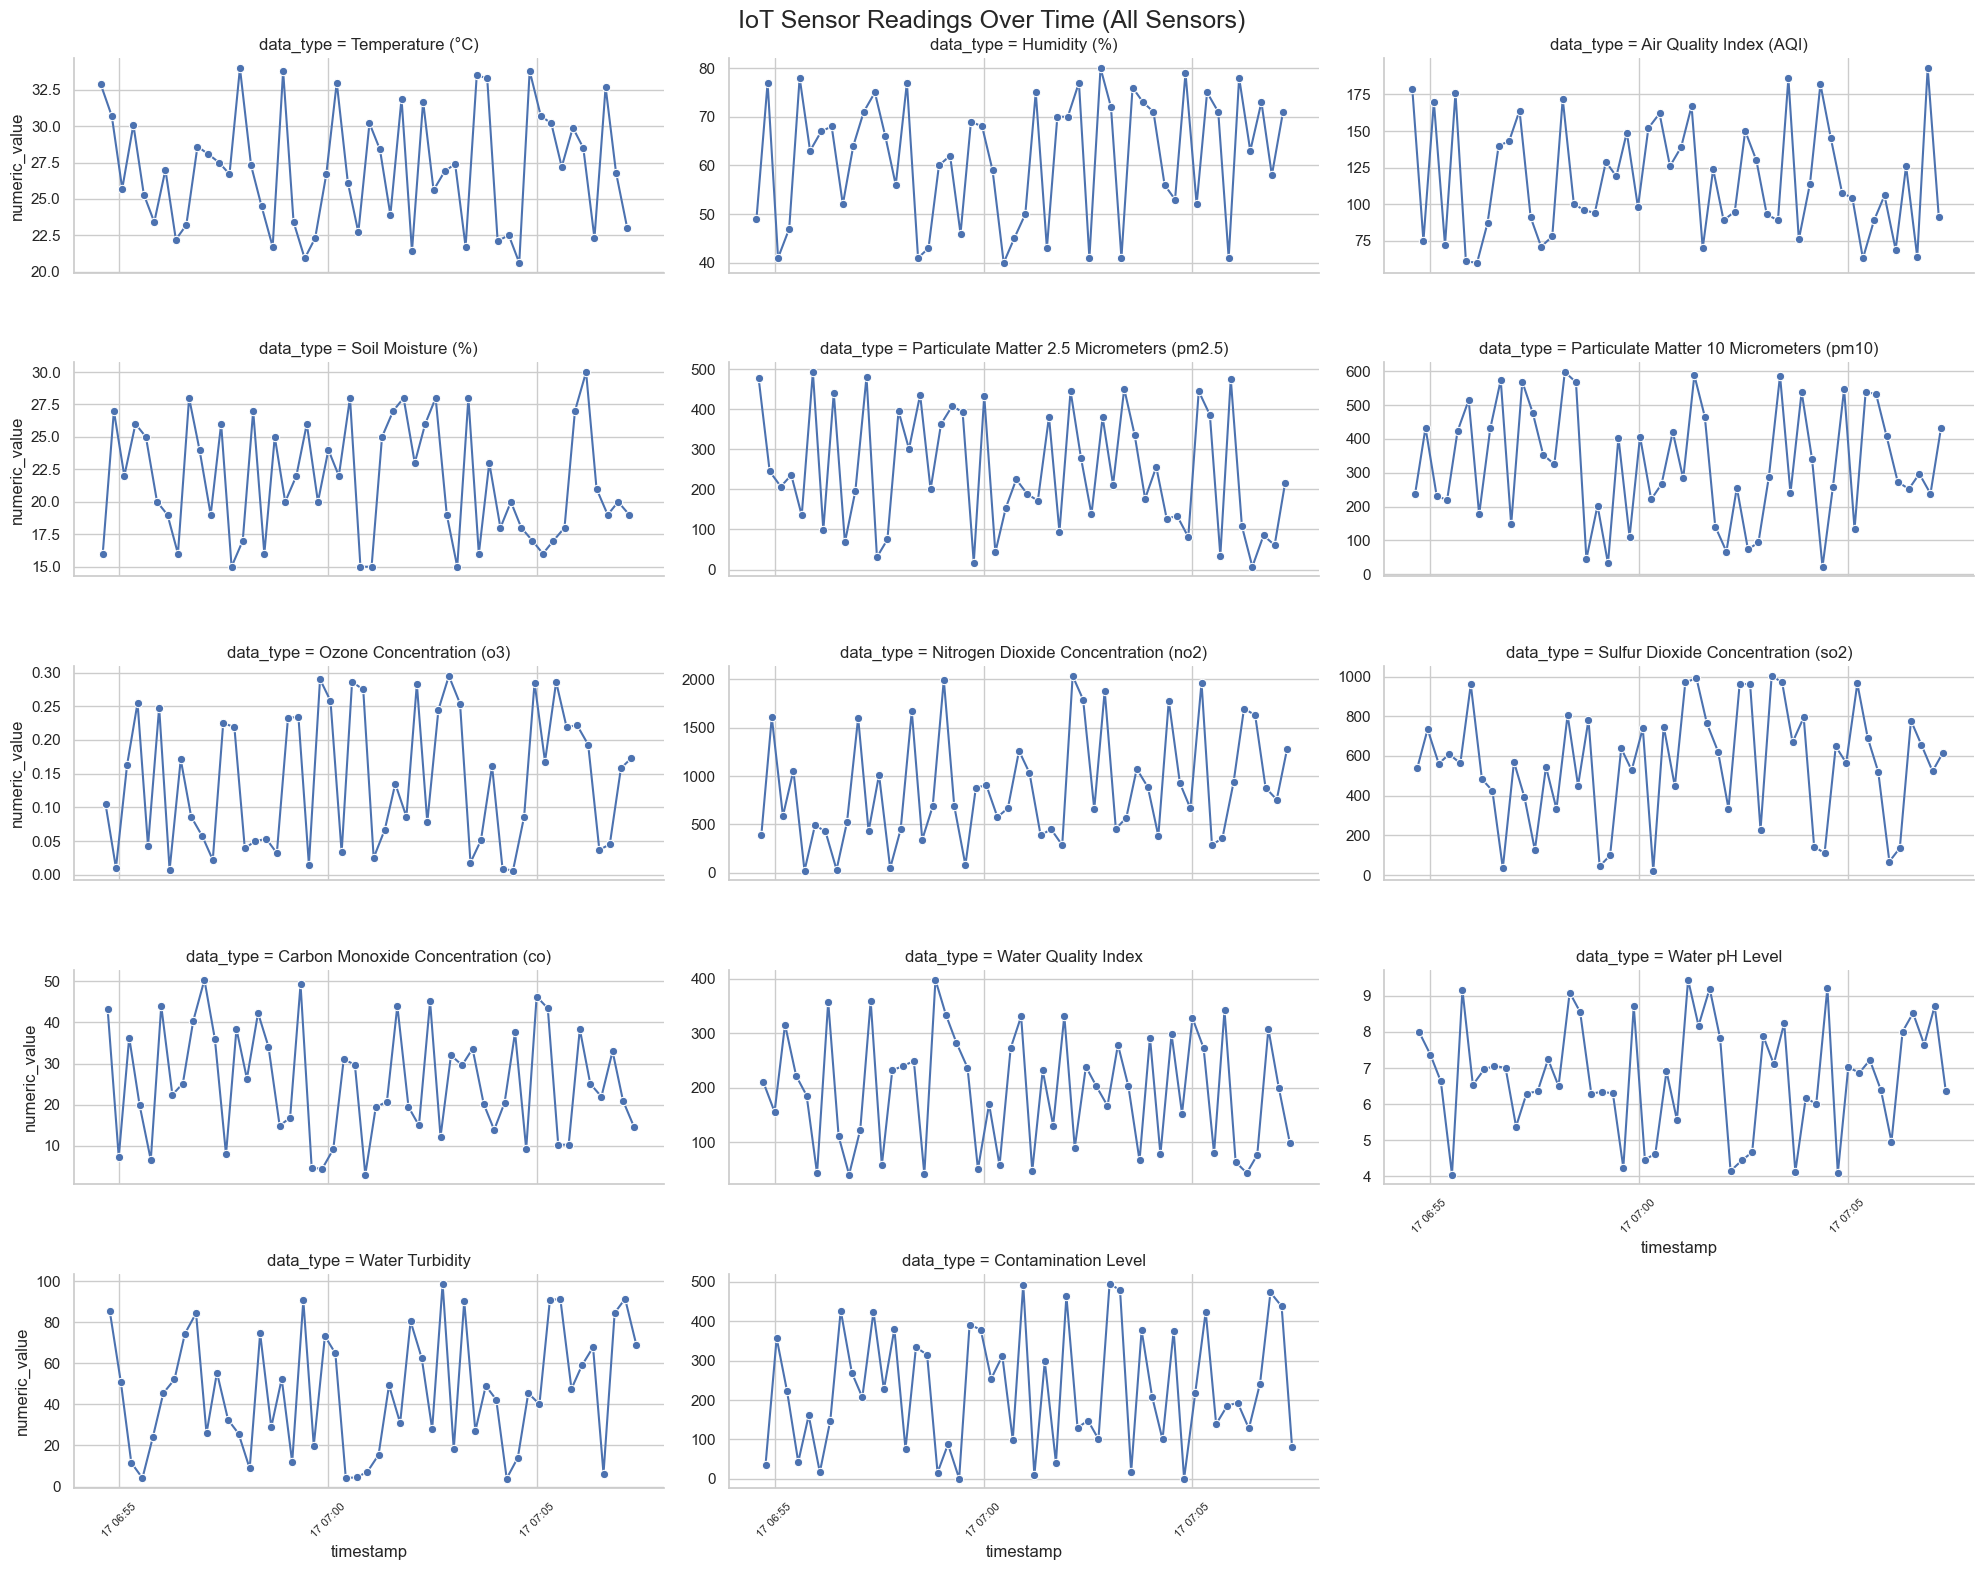

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean columns
df.columns = df.columns.str.strip()
df['data_type'] = df['data_type'].str.strip()

# Select the sensor fields you want to include in the plot
sensor_fields = [
    'Temperature (°C)', 'Humidity (%)', 'Air Quality Index (AQI)',
    'Soil Moisture (%)', 'Particulate Matter 2.5 Micrometers (pm2.5)',
    'Particulate Matter 10 Micrometers (pm10)', 'Ozone Concentration (o3)',
    'Nitrogen Dioxide Concentration (no2)', 'Sulfur Dioxide Concentration (so2)',
    'Carbon Monoxide Concentration (co)', 'Water Quality Index',
    'Water pH Level', 'Water Turbidity', 'Contamination Level'
]

# Filter out any rows not in the list
df = df[df['data_type'].isin(sensor_fields)].copy()

# Plot it!
sns.set(style="whitegrid")

# Adjust FacetGrid layout
g = sns.FacetGrid(df, col="data_type", col_wrap=3, height=5, aspect=1.5, sharey=False)

# Draw the line plots
g.map(sns.lineplot, "timestamp", "numeric_value", marker="o")

# Adjust the overall figure size
g.fig.set_size_inches(20, 16)

# Improve x-axis labels
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)

# Adjust spacing between plots and add title
g.fig.subplots_adjust(top=0.93, hspace=0.4)
g.fig.suptitle("IoT Sensor Readings Over Time (All Sensors)", fontsize=18)

#Make layout tighter
plt.tight_layout()

#Show the plot
plt.show()